In [1]:
### dependencies..
import numpy as np
import pandas as pa
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pa.read_csv('./train.csv')
test = pa.read_csv('./test.csv')
submission = pa.read_csv('./sample_submission.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
test['is_promoted']='NaN'
combined = pa.concat([train,test],axis=0)
combined=combined.reset_index()
del combined['index']

In [8]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


<h1>EDA:</h1>

In [11]:
### check the different data types;

combined.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted              object
dtype: object

In [14]:
### in total:

combined.dtypes.value_counts()

int64      7
object     6
float64    1
dtype: int64

In [13]:
#### Department:
#### relationship between the categorical var and my target :

train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

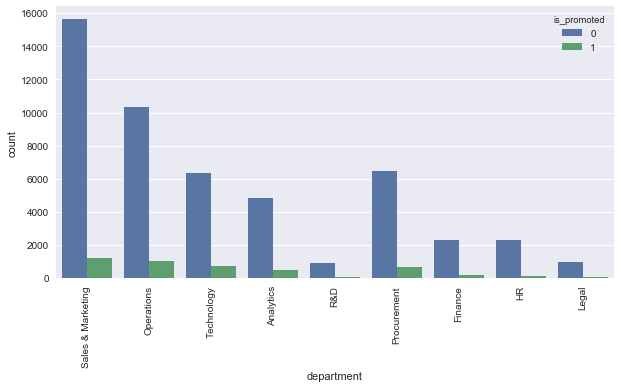

In [35]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
plot=sns.countplot(x=train['department'],hue=train['is_promoted'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

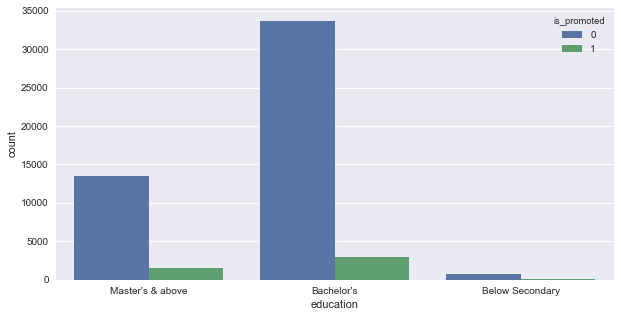

In [37]:
#### Education:

plt.figure(figsize=(10,5))
plot=sns.countplot(x=train['education'],hue=train['is_promoted'])
plt.show()

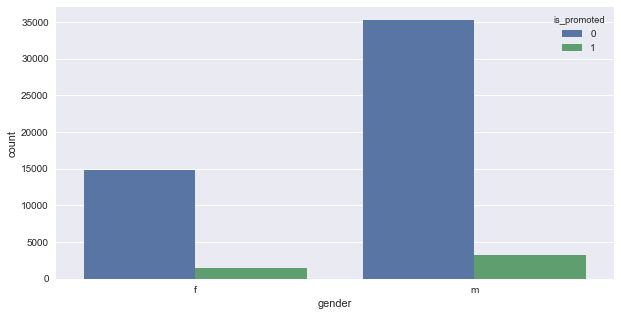

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['gender'],hue=train['is_promoted'])
plt.show()

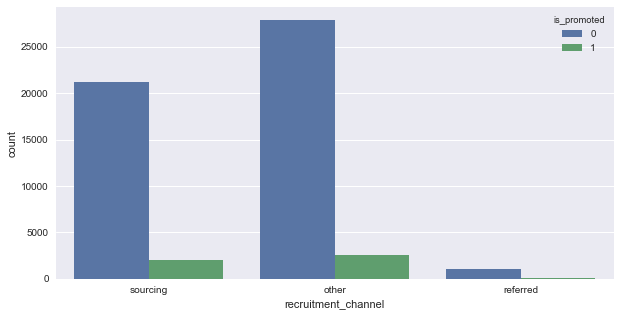

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['recruitment_channel'],hue=train['is_promoted'])
plt.show()

In [45]:
#### handle the missing value:


combined.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [47]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
### use mode for the education:


